# Belt Exam - Reservas de hotel

Ricardo Bautista

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Existen cuatro variables que presentan valores nulos:
- children                               
- country                              
- agent   
- company                                                      

En este caso se tendrá en consideración que las variables: children se podrá imputar por medio de un método de pandas. No obstante, con country que es una variable nominal no ordinal se optará por borrar las filas de sus valores faltantes y para company notar que presenta muchos valores perdidos, por lo que se optará por eliminar la columna. Por último, para agent se optará por eliminar las columnas vacías.

In [6]:
df = df.drop(columns=['company'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 31)

In [8]:
df = df[df['country'].notna()]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df.shape

(118902, 31)

In [10]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16006
days_in_waiting_list                  0


In [11]:
df.dropna(subset=['agent'], inplace=True)

In [12]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          2
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [13]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [14]:
#Se usará bfill porque el número de hijos debe ser un número entero
df['children'].fillna(method='bfill', inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [15]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Gráficos

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [65]:
plt.style.use('ggplot')

In [61]:
market_segment_cancelations = df.groupby(['market_segment']).sum()[['is_canceled']]
market_segment_cancelations

,is_canceled
market_segment,
Aviation,6
Complementary,12
Corporate,171
Direct,1180
Groups,10059
Offline TA/TO,8041
Online TA,20694


Text(0.5, 0, 'Tipo de segmento de mercado')

<Figure size 800x480 with 0 Axes>

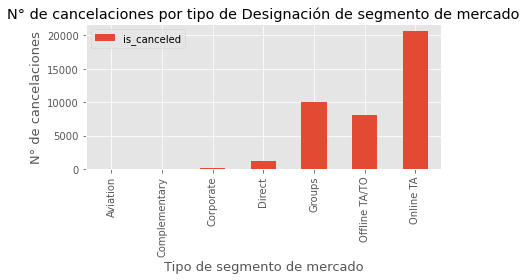

In [66]:
plt.figure(figsize=(10, 6), dpi=80)
market_segment_cancelations.plot.bar()
plt.title('N° de cancelaciones por tipo de Designación de segmento de mercado')
plt.ylabel('N° de cancelaciones', fontsize = 13)
plt.xlabel('Tipo de segmento de mercado', fontsize = 13)

Se puede apreciar que el segmento de mercado que presenta más cancelaciones es el de agentes de viajes online. Por lo tanto sería  recomendable revisar información y rating de las mismas para confirmar viabilidad y certeza de sus reservas

In [20]:
data_Tipo_Consumidor = df.groupby(['customer_type', 'hotel']).sum()[['is_canceled']]
data_Tipo_Consumidor

is_canceled
customer_type   hotel                    
Contract        City Hotel           1105
                Resort Hotel          157
Group           City Hotel             23
                Resort Hotel           17
Transient       City Hotel          24982
                Resort Hotel         8427
Transient-Party City Hotel           4369
                Resort Hotel         1083

Text(0.5, 0, 'Tipo de consumidor')

<Figure size 800x1280 with 0 Axes>

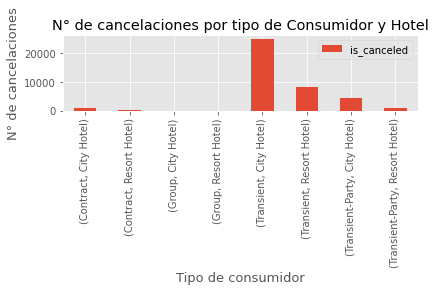

In [79]:
plt.figure(figsize=(10, 16), dpi=80)
data_Tipo_Consumidor.plot.bar()
plt.title('N° de cancelaciones por tipo de Consumidor y Hotel')
plt.ylabel('N° de cancelaciones', fontsize = 13)
plt.xlabel('Tipo de consumidor', fontsize = 13)

En cuanto tipos de consumidores y hotel, se puede apreciar que en los hoteles de ciudad y en el tipo de cosumidor transitorio existe un elevado número de cancelaciones respecto a los demás segmentos.

In [83]:
#Basado en https://datatofish.com/string-to-integer-dataframe/
df['children']=df['children'].astype(int)

In [84]:
data_Cancelaciones = df.groupby(['adults', 'children']).sum()[['is_canceled']]
data_Cancelaciones

is_canceled
adults children             
0      0                  10
       1                   0
       2                  78
       3                   2
1      0                5061
       1                  60
       2                  48
       3                   1
2      0               30158
       1                1242
       2                1374
       3                  12
       10                  1
3      0                1885
       1                 205
       2                   8
4      0                  12
       1                   1
26     0                   5

Text(0.5, 0, 'N° de adultos y niños')

<Figure size 640x320 with 0 Axes>

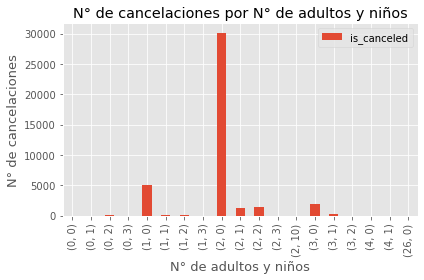

In [92]:
plt.figure(figsize=(8, 4), dpi=80)
data_Cancelaciones.plot.bar()
plt.title('N° de cancelaciones por N° de adultos y niños')
plt.ylabel('N° de cancelaciones', fontsize = 13)
plt.xlabel('N° de adultos y niños', fontsize = 13)

Existe un mayor número de cancelaciones en reservas de solo dos adultos. Esto puede ser por el hecho de el mayor número de viajes son realizados por parejas jóvenes sin hijos que puedan tener cambios repentinos de planes o una mala planificación de los viajes que haga que los cancelen.

In [24]:
Cancelaciones_año = df.groupby(['arrival_date_year']).sum()[['is_canceled']]
Cancelaciones_año

,is_canceled
arrival_date_year,
2015,7448
2016,18803
2017,13912


Text(0.5, 0, 'Año de llegada')

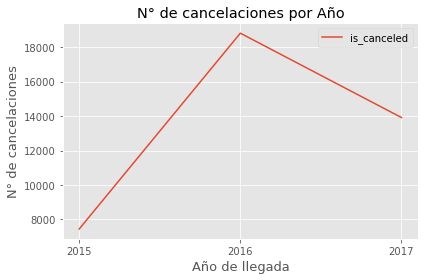

In [88]:
Cancelaciones_año.plot.line().locator_params(integer=True)
plt.title('N° de cancelaciones por Año')
plt.ylabel('N° de cancelaciones', fontsize = 13)
plt.xlabel('Año de llegada', fontsize = 13)

In [89]:
Reservas_año = df.groupby(['arrival_date_year']).sum()[['Reserva']]
Reservas_año

,Reserva
arrival_date_year,
2015,11397
2016,30253
2017,21083


Text(0.5, 0, 'Año de llegada')

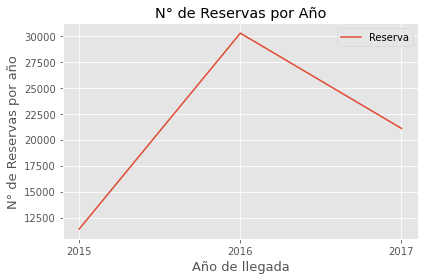

In [91]:
Reservas_año.plot.line().locator_params(integer=True)
plt.title('N° de Reservas por Año')
plt.ylabel('N° de Reservas por año', fontsize = 13)
plt.xlabel('Año de llegada', fontsize = 13)

In [59]:
#Tomado de https://www.scivision.dev/matplotlib-force-integer-labeling-of-axis/ para forzar eje X como Integer y no Float
from matplotlib.ticker import MaxNLocator

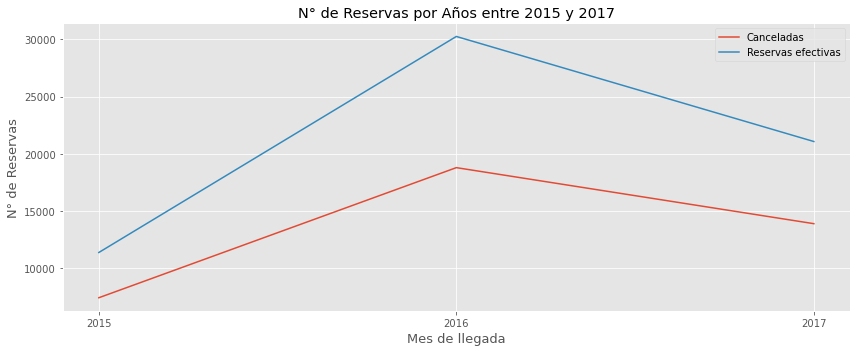

In [75]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Reservas_año.index,Cancelaciones_año['is_canceled'], label='Canceladas')
ax.plot(Reservas_año.index,Reservas_año['Reserva'], label='Reservas efectivas')
plt.title('N° de Reservas por Años entre 2015 y 2017')
plt.ylabel('N° de Reservas', fontsize = 13)
plt.xlabel('Mes de llegada', fontsize = 13)
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Dentro del ámbito anual, la mayor cantidad de reservas efectivas y canceladas se dio en el año 2016. Aún así, se puede apreciar que el número de reservas efectivas es mucho mayor al de las canceladas.

In [26]:
Cancelaciones_mes_1 = df.groupby(['arrival_date_month']).sum()[['is_canceled']]
Cancelaciones_mes_2 = Cancelaciones_mes_1.reset_index() #De https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
Cancelaciones_mes_2

,arrival_date_month,is_canceled
0,April,4138
1,August,5014
2,December,2177
3,February,2408
4,January,1552
5,July,4471
6,June,4103
7,March,2838
8,May,4051
9,November,1699


In [27]:
Meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [28]:
#Me basé de aqui https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name
Cancelaciones_mes_2['arrival_date_month'] = pd.Categorical(Cancelaciones_mes_2['arrival_date_month'], categories=Meses, ordered=True)
Cancelaciones_mes_2.sort_values(by='arrival_date_month',inplace=True)
Cancelaciones_mes_2

,arrival_date_month,is_canceled
4,January,1552
3,February,2408
7,March,2838
0,April,4138
8,May,4051
6,June,4103
5,July,4471
1,August,5014
11,September,3825
10,October,3887


Text(0.5, 0, 'Mes de llegada')

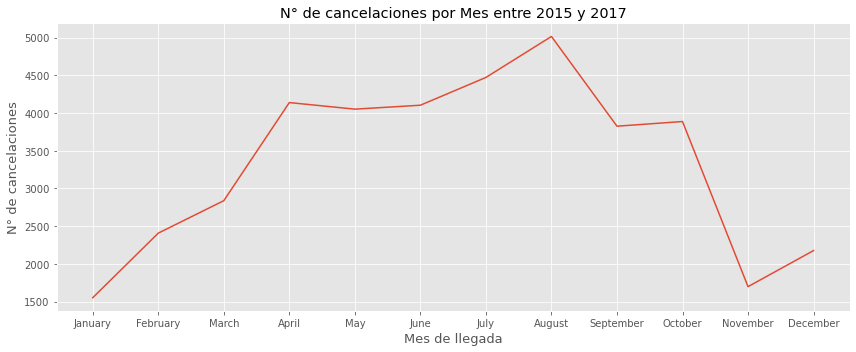

In [76]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Cancelaciones_mes_2['arrival_date_month'],Cancelaciones_mes_2['is_canceled'])
plt.title('N° de cancelaciones por Mes entre 2015 y 2017')
plt.ylabel('N° de cancelaciones', fontsize = 13)
plt.xlabel('Mes de llegada', fontsize = 13)

In [35]:
#Basado en https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
df['Reserva'] = np.where(df['is_canceled']==1, 0, 1)

In [41]:
Reservas = df.groupby(['arrival_date_month']).sum()[['Reserva']]
Reservas = Reservas.reset_index()
Reservas

,arrival_date_month,Reserva
0,April,5608
1,August,7660
2,December,3443
3,February,4037
4,January,2994
5,July,7128
6,June,5700
7,March,5294
8,May,6036
9,November,3697


In [42]:
Reservas['arrival_date_month'] = pd.Categorical(Cancelaciones_mes_2['arrival_date_month'], categories=Meses, ordered=True)
Reservas.sort_values(by='arrival_date_month',inplace=True)
Reservas

,arrival_date_month,Reserva
0,January,5608
1,February,7660
2,March,3443
3,April,4037
4,May,2994
5,June,7128
6,July,5700
7,August,5294
8,September,6036
9,October,3697


Text(0.5, 0, 'Mes de llegada')

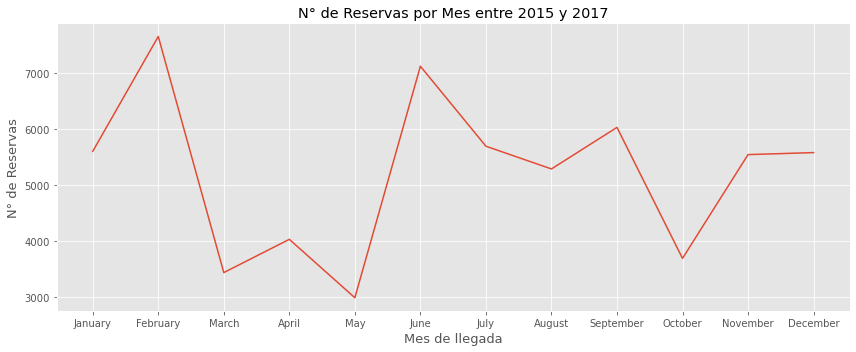

In [77]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Reservas['arrival_date_month'],Reservas['Reserva'])
plt.title('N° de Reservas por Mes entre 2015 y 2017')
plt.ylabel('N° de Reservas', fontsize = 13)
plt.xlabel('Mes de llegada', fontsize = 13)

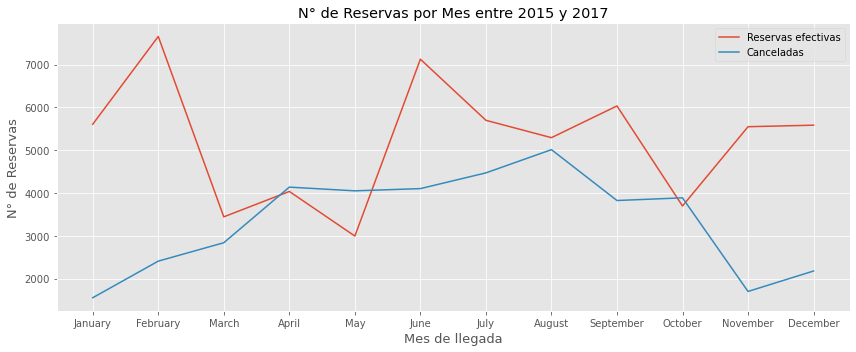

In [78]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Reservas['arrival_date_month'],Reservas['Reserva'], label='Reservas efectivas')
ax.plot(Cancelaciones_mes_2['arrival_date_month'],Cancelaciones_mes_2['is_canceled'], label='Canceladas')
plt.title('N° de Reservas por Mes entre 2015 y 2017')
plt.ylabel('N° de Reservas', fontsize = 13)
plt.xlabel('Mes de llegada', fontsize = 13)
ax.legend()

Al ver el ámbito mensual dentro de los años 2015-2017, se puede apreciar que el mayor número de reservas efectivas se dan en el mes de Febrero y Junio. Por otro lado, el mayor número de cancelaciones se dan en el mes de Agosto y Abril.

Asimismo, se puede ver que presentan mucha volatilidad y que no necesariamente ambas se mueven en la misma dirección.

Es preciso mencionar que la brecha más pronunciada se da en el mes de Febrero.